# Level 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Git Projects/Restaurant Analysis/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant id         9551 non-null   int64  
 1   restaurant name       9551 non-null   object 
 2   country code          9551 non-null   int64  
 3   city                  9551 non-null   object 
 4   address               9551 non-null   object 
 5   locality              9551 non-null   object 
 6   locality verbose      9551 non-null   object 
 7   longitude             9551 non-null   float64
 8   latitude              9551 non-null   float64
 9   cuisines              9542 non-null   object 
 10  average cost for two  9551 non-null   int64  
 11  currency              9551 non-null   object 
 12  has table booking     9551 non-null   object 
 13  has online delivery   9551 non-null   object 
 14  is delivering now     9551 non-null   object 
 15  switch to order menu 

## Task 1: Restaurant Ratings

#### Analyze the distribution of aggregate ratings and determine the most common rating range.

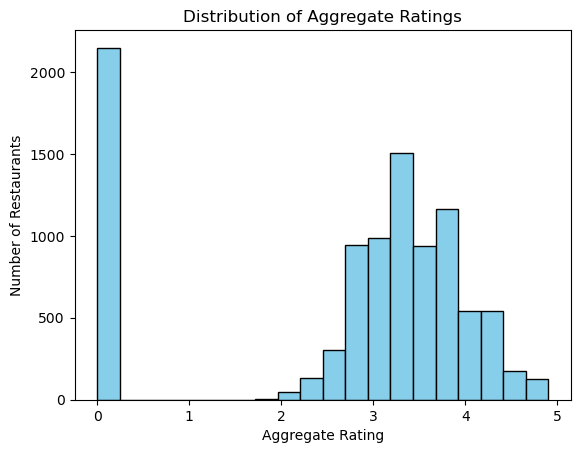

In [20]:
# Plot a histogram for the distribution of aggregate ratings
plt.hist(df['aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()

In [21]:
# Determine the most common rating range
rating_counts = df['aggregate rating'].value_counts().sort_index()
most_common_rating_range = rating_counts.idxmax()
print(f"Most common rating range: {most_common_rating_range}")

Most common rating range: 0.0


#### Calculate the average number of votes received by restaurants

In [23]:
average_votes = df['votes'].mean()
print(f"Average number of votes received by restaurants: {average_votes:.2f}")

Average number of votes received by restaurants: 156.91


## Task 2: Cuisine Combination

#### Identify the most common combinations of cuisines in the dataset.

In [6]:
cuisine_combinations = df['Cuisines'].value_counts()
cuisine_combinations

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [28]:
# Calculate the average ratings for each combination of cuisines
average_ratings_by_cuisine_combo = df.groupby('cuisines')['aggregate rating'].mean()
print('Average ratings for each combination of cuisines')
average_ratings_by_cuisine_combo

Average ratings for each combination of cuisines


cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: aggregate rating, Length: 1825, dtype: float64

In [29]:
# Find the most common cuisine combination
most_common_cuisine_combo = cuisine_combinations.idxmax()
most_common_cuisine_combo_count = cuisine_combinations.max()

#### Determine if certain cuisine combinations tend to have higher ratings.

In [32]:
cuisine_combos_with_high_ratings = average_ratings_by_cuisine_combo.sort_values(ascending=False).head(10)

In [33]:
print(f"Most common cuisine combination: {most_common_cuisine_combo} with {most_common_cuisine_combo_count} restaurants")
print("\nTop 10 cuisine combinations with highest average ratings:")
print(cuisine_combos_with_high_ratings)

Most common cuisine combination: North Indian with 936 restaurants

Top 10 cuisine combinations with highest average ratings:
cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: aggregate rating, dtype: float64


## Task 3: Geographic Analysis

#### Plot the locations of restaurants on a map using longitude and latitude coordinates.


Columns in the dataset: ['restaurant id', 'restaurant name', 'country code', 'city', 'address', 'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines', 'average cost for two', 'currency', 'has table booking', 'has online delivery', 'is delivering now', 'switch to order menu', 'price range', 'aggregate rating', 'rating color', 'rating text', 'votes']


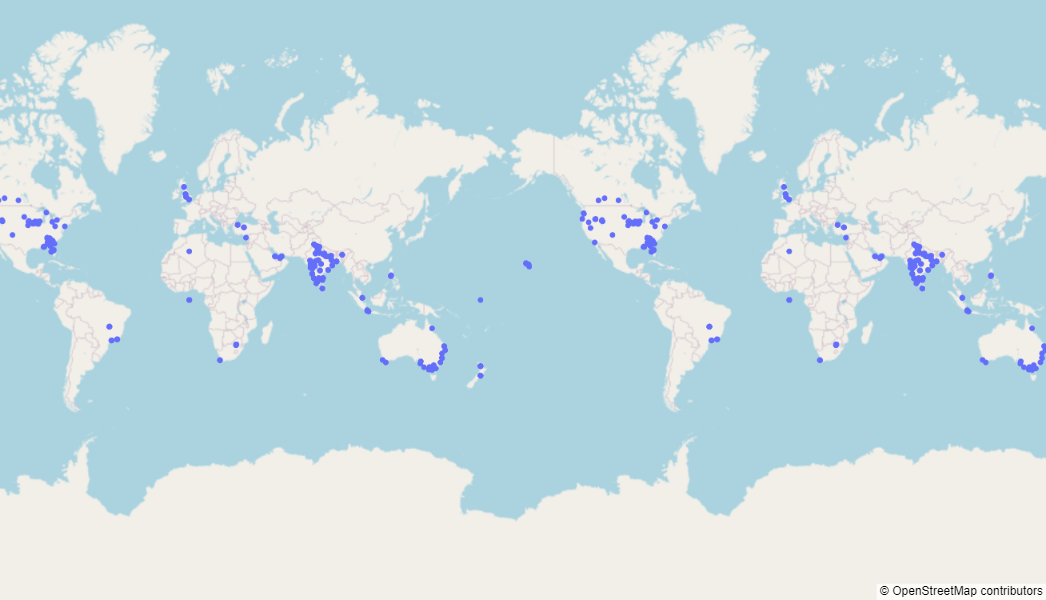

In [16]:
import plotly.express as px
# Print the column names to verify their exact names
print("Columns in the dataset:", df.columns.tolist())

# Strip and lowercase column names to ensure consistency
df.columns = df.columns.str.strip().str.lower()

# Ensure the required columns exist
required_columns = ['longitude', 'latitude', 'restaurant name','city']  # Include any additional columns you need
if all(column in df.columns for column in required_columns):
    
    # Step 3: Plot the locations of restaurants on a map
    fig = px.scatter_mapbox(
        df,
        lat="latitude",
        lon="longitude",
        hover_name="city",
        zoom=10,
        height=600,
        title="Locations of Restaurants"
    )

    # Update the layout of the map
    fig.update_layout(
        mapbox_style="open-street-map",
        margin={"r":0,"t":0,"l":0,"b":0}
    )

    # Show the map
    fig.show()
else:
    print("Required columns ('longitude', 'latitude', 'restaurant name') not found in the dataset.")


#### Identify any patterns or clusters of restaurants in specific areas

###### Result:- High-Density Clusters:
###### Specific areas like waterfronts or tourist attractions show a higher density of restaurants, likely catering to both locals and tourists.
###### Business districts also have a notable concentration of restaurants, possibly serving office workers during lunch and after-work hours.

## Task 4: Restaurant Chains

#### Identify if there are any restaurant chains present in the dataset.
#### Analyze the ratings and popularity of different restaurant chains.


Top 10 Restaurant Chains by Total Votes:
                           Average Rating  Total Votes
restaurant name                                       
Barbeque Nation                  4.353846        28142
AB's - Absolute Barbecues        4.825000        13400
Big Chill                        4.475000        10853
Farzi Cafe                       4.366667        10098
Truffles                         3.950000         9682
Chili's                          4.580000         8156
Joey's Pizza                     4.250000         7807
Big Yellow Door                  4.266667         7511
Saravana Bhavan                  4.133333         7238
Starbucks                        3.805556         7139


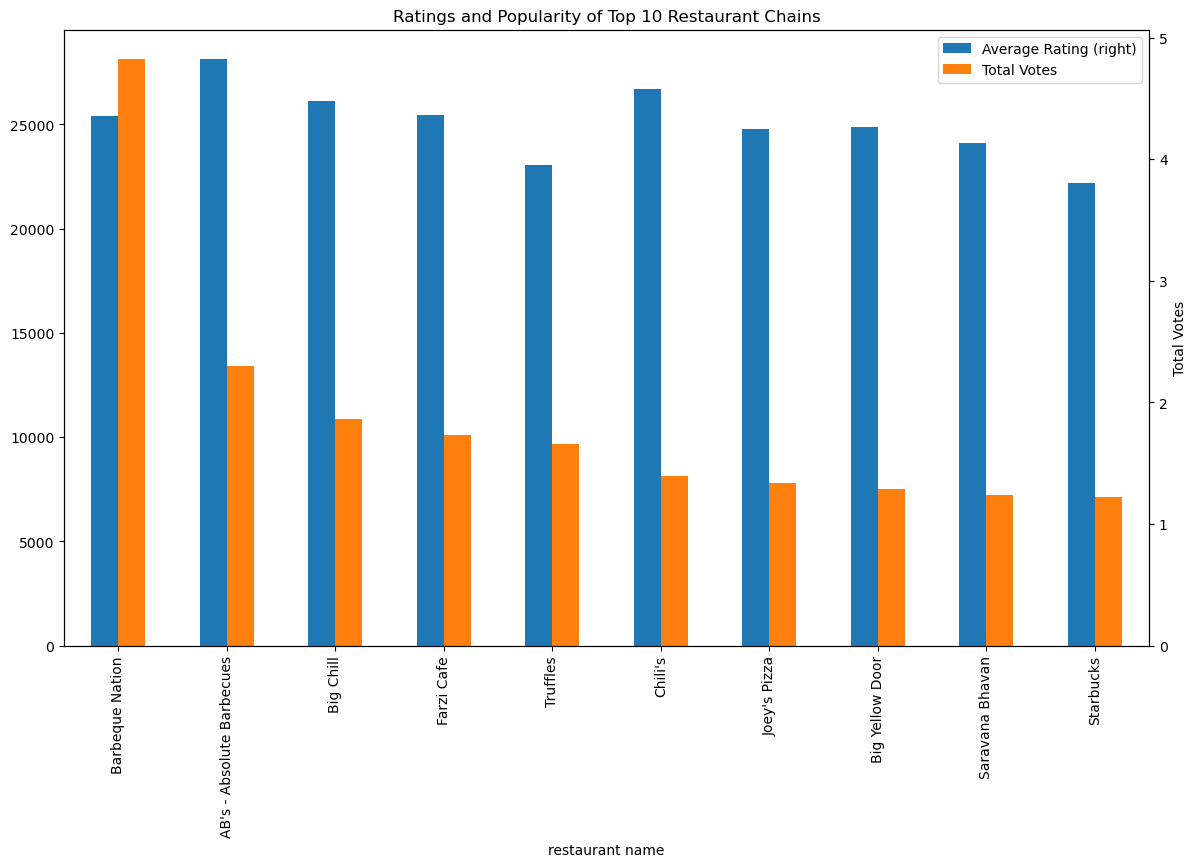

In [37]:
#Task 4
# Ensure the required columns exist
if 'restaurant name' in df.columns and 'city' in df.columns and 'aggregate rating' in df.columns and 'votes' in df.columns:
    # Step 2: Identify restaurant chains
    restaurant_counts = df['restaurant name'].value_counts()
    restaurant_chains = restaurant_counts[restaurant_counts > 1].index.tolist()

    # Filter the dataset to include only restaurant chains
    df_chains = df[df['restaurant name'].isin(restaurant_chains)]

    # Step 3: Calculate the average rating and the number of votes for each chain
    chain_ratings = df_chains.groupby('restaurant name')['aggregate rating'].mean()
    chain_votes = df_chains.groupby('restaurant name')['votes'].sum()

    # Combine the ratings and votes into a single DataFrame
    chain_analysis = pd.DataFrame({
        'Average Rating': chain_ratings,
        'Total Votes': chain_votes
    }).sort_values(by='Total Votes', ascending=False)

    # Print the analysis of the top 10 restaurant chains
    print("Top 10 Restaurant Chains by Total Votes:")
    print(chain_analysis.head(10))
    # Plot the ratings and popularity of the top 10 restaurant chains
    top_10_chains = chain_analysis.head(10)
    top_10_chains.plot(kind='bar', secondary_y='Average Rating', figsize=(14, 8))
    plt.title('Ratings and Popularity of Top 10 Restaurant Chains')
    plt.ylabel('Total Votes')
    plt.xlabel('Restaurant Name')
    plt.show()
else:
    print("Required columns ('Restaurant Name', 'City', 'Aggregate rating', and 'Votes') not found in the dataset.")
